In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans,AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import seaborn as sns

df = pd.read_csv("crime_data.csv")


In [7]:
df.head()

,Cities,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Cities    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [9]:
df.isnull().sum()

Cities      0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [11]:
X = df.iloc[:,1:]
X.head()


,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [12]:
array = X.values
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [15]:
X1 = pd.DataFrame(array,columns=df.columns[:-1])

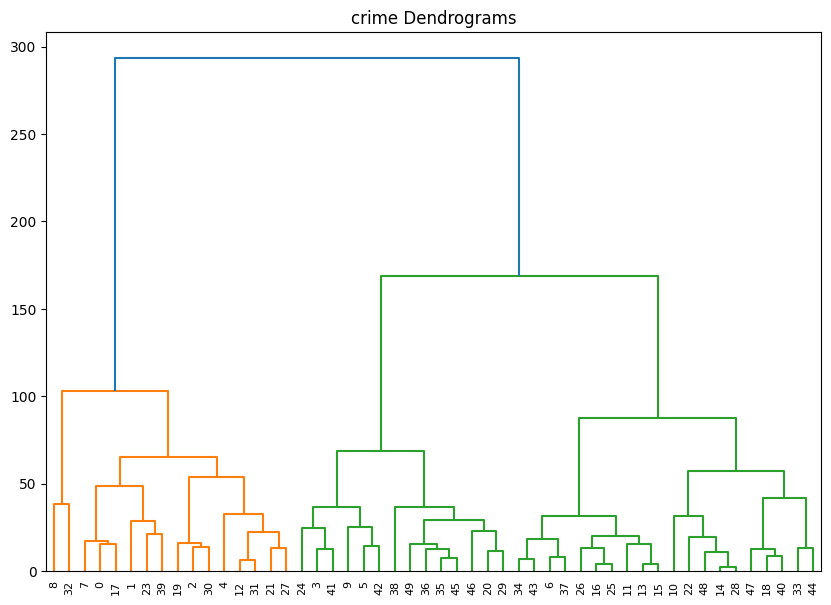

In [16]:
plt.figure(figsize=(10,7))
plt.title("crime Dendrograms")
dend = sch.dendrogram(sch.linkage(X1, method='complete'))

In [17]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
Y2 = cluster.fit_predict(X1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [18]:
Y2_df = pd.DataFrame({'Cluster': Y2})

In [19]:
counts = Y2_df['Cluster'].value_counts()
counts


1    20
0    16
2    14
Name: Cluster, dtype: int64

In [23]:
Y = df.iloc[:,-1]
X = df.iloc[:, 1:4].values
X


array([[ 13.2, 236. ,  58. ],
       [ 10. , 263. ,  48. ],
       [  8.1, 294. ,  80. ],
       [  8.8, 190. ,  50. ],
       [  9. , 276. ,  91. ],
       [  7.9, 204. ,  78. ],
       [  3.3, 110. ,  77. ],
       [  5.9, 238. ,  72. ],
       [ 15.4, 335. ,  80. ],
       [ 17.4, 211. ,  60. ],
       [  5.3,  46. ,  83. ],
       [  2.6, 120. ,  54. ],
       [ 10.4, 249. ,  83. ],
       [  7.2, 113. ,  65. ],
       [  2.2,  56. ,  57. ],
       [  6. , 115. ,  66. ],
       [  9.7, 109. ,  52. ],
       [ 15.4, 249. ,  66. ],
       [  2.1,  83. ,  51. ],
       [ 11.3, 300. ,  67. ],
       [  4.4, 149. ,  85. ],
       [ 12.1, 255. ,  74. ],
       [  2.7,  72. ,  66. ],
       [ 16.1, 259. ,  44. ],
       [  9. , 178. ,  70. ],
       [  6. , 109. ,  53. ],
       [  4.3, 102. ,  62. ],
       [ 12.2, 252. ,  81. ],
       [  2.1,  57. ,  56. ],
       [  7.4, 159. ,  89. ],
       [ 11.4, 285. ,  70. ],
       [ 11.1, 254. ,  86. ],
       [ 13. , 337. ,  45. ],
       [  

In [24]:
Y

0     21.2
1     44.5
2     31.0
3     19.5
4     40.6
5     38.7
6     11.1
7     15.8
8     31.9
9     25.8
10    20.2
11    14.2
12    24.0
13    21.0
14    11.3
15    18.0
16    16.3
17    22.2
18     7.8
19    27.8
20    16.3
21    35.1
22    14.9
23    17.1
24    28.2
25    16.4
26    16.5
27    46.0
28     9.5
29    18.8
30    32.1
31    26.1
32    16.1
33     7.3
34    21.4
35    20.0
36    29.3
37    14.9
38     8.3
39    22.5
40    12.8
41    26.9
42    25.5
43    22.9
44    11.2
45    20.7
46    26.2
47     9.3
48    10.8
49    15.6
Name: Rape, dtype: float64

In [26]:
##get_ipython().run_line_magic('matplotlib', 'qt')
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])


<Figure size 1600x900 with 0 Axes>

In [27]:
# Initializing KMeans
from sklearn.cluster import KMeans
KMeans()
kmeans = KMeans(n_clusters=4,n_init=20)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
Y = kmeans.predict(X)


In [28]:
Y = pd.DataFrame(Y)
Y.value_counts()


0    16
2    14
1    10
3    10
dtype: int64

In [30]:
Y = df['Target2']

In [31]:
df.head()

,Cities,Murder,Assault,UrbanPop,Rape,Target2
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,0


In [32]:
kmeans.inertia_

32384.73507142857

In [34]:
cluster = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(X)
    cluster.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [35]:
cluster

[351509.0928,
 93815.27001642037,
 45454.48307142858,
 32516.22435314685,
 22088.09257142857,
 16660.33066666667,
 13409.790444444447,
 11242.141634920634,
 9132.336976190476,
 7925.460809523811]

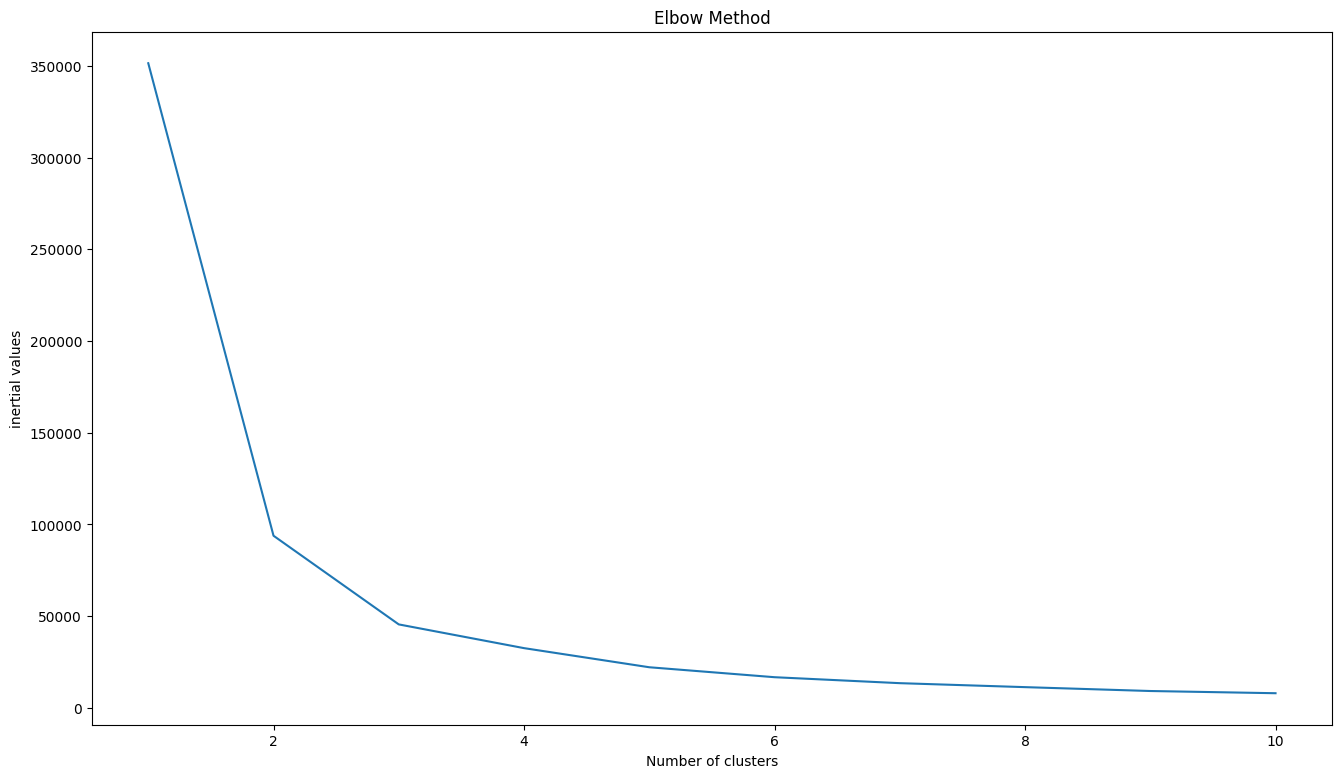

In [36]:
plt.plot(range(1, 11), cluster)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('inertial values')
plt.show()